In [1]:
import pandas as pd
import numpy as np
import csv
from collections import Counter
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [2]:
# 리뷰 출력시 ... 없이 전부 나오게 설정
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [3]:
kurly_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_preprocessed.csv", index_col=0)

In [19]:
kurly_data.head(1)

,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewDate,ReviewLike,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
0,5136210,일반,박**,[바로생활] 아카시아꿀 스틱 10포,"작은 박스로 2개 (10개씩 들어있어 20개 네요 ) 주문 했습니다. 의심이 많은 타입이라 뭐든 한번에 주문한적이 없고 ,, 꼭 먹어보고 써보고 나서야 안심하는 타입입니다 ㅋ 요즘은..아카시아가 많이 없어 .. 아카시아 향 맏아보기도 정말 힘든데.. 아카시아 꿀이라니 ^^ 너무 반갑고 예뻐 주문해 봤습니다. 일단 너무 작고 예쁘네요 . 더운 여름에 밖에서 운동하는 딸을 위해 건강한 간식으로 챙겨 주려고 합니다. 예쁜 포장이라 예민한 아이 마음에도 쏙 드는 듯 합니다. 배송도 빠르고 좋은제품 좋은 가격에 잘 산걸 같아 기분 좋네요.^^",2023.06.23,0,1,0.99409,"[박스, 2, 개, 10, 개, 씩, 20, 개, 네, 주문, 의심, 타입, 뭐, 번, 주문, 적, 안심, 타입, ㅋ, 요즘, 아카시아, 아카시아, 향, 아카시아, 꿀, 주문, 여름, 밖, 운동, 딸, 건강, 간식, 포장, 아이, 마음, 듯, 배송, 제품, 가격, 거, 기분]","[작, 들, 있, 하, 많, 이, 하, 없, 먹, 보, 쓰, 보, 나, 하, 이, 없, 맏아보, 힘들, 이, 반갑, 예쁘, 하, 보, 작, 예쁘, 덥, 하, 위하, 하, 챙기, 주, 하, 예쁘, 이, 예민하, 들, 하, 빠르, 좋, 좋, 살, 같, 좋]"


In [5]:
kurly_data['token_nouns_bareun'] = kurly_data['token_nouns_bareun'].apply(lambda x:eval(x))
kurly_data['token_verbs_bareun'] = kurly_data['token_verbs_bareun'].apply(lambda x:eval(x))

In [6]:
def kw_in_df(keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(kurly_data[kurly_data['ReviewText'].apply(lambda x:keyword in x)]['ReviewText']),'건')
    return kurly_data[kurly_data['ReviewText'].apply(lambda x:keyword in x)]['ReviewText']

In [7]:
def kw_in_nouns(keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(kurly_data[kurly_data['token_nouns_bareun'].apply(lambda x:keyword in x)]['ReviewText']),'건')
    return kurly_data[kurly_data['token_nouns_bareun'].apply(lambda x:keyword in x)]['ReviewText']

In [8]:
def frequency_analysis(data, n):
    words = pd.DataFrame(Counter(sum(data.to_list(), [])).most_common(n), columns = ['Token','Frequency'])
    return words

In [9]:
#워드클라우드 함수
def wc_analysis(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    #img = Image.open("C:/Users/NT550-048/Desktop/잇더/rice.jpg")
    #imgArray = np.array(img)
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",
                        width=800, height=500).generate_from_frequencies(words)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud) 
    plt.axis('off')
    plt.show()

In [10]:
def wc_kw(kw_option, keyword):
    if kw_option == 1: # 1은 용언 키워드, 2는 명사 키워드
        return wc_analysis(kurly_data[kurly_data['ReviewText'].apply(lambda x:keyword in x)]['token_verbs_bareun'])
    elif kw_option == 2:
        return wc_analysis(kurly_data[kurly_data['ReviewText'].apply(lambda x:keyword in x)]['token_nouns_bareun'])
    else:
        return print('옵션 확인')

### 제주 꿀스틱 분석

In [ ]:
kurly_data[kurly_data['ProductCode']==5026039]

In [12]:
kurlyjeju_noun_frequency = frequency_analysis(kurly_data[kurly_data['ProductCode']==5026039]['token_nouns_bareun'], 500)

In [26]:
kurlyjeju_noun_frequency.to_excel(r'C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\frequency_excel\kurly_jeju_noun_frequency.xlsx')

In [13]:
kurly_data[kurly_data['ProductCode']==5026039]['sentiment_label'].value_counts()

sentiment_label
1    5188
0     284
Name: count, dtype: int64

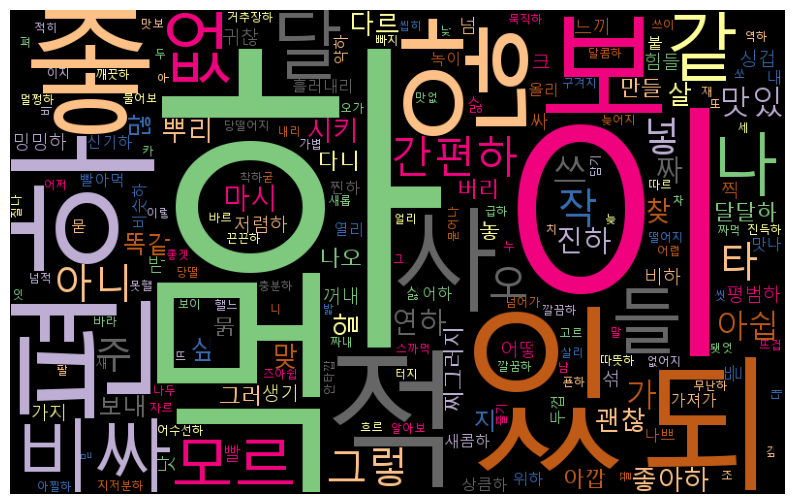

In [35]:
wc_analysis(kurly_data[(kurly_data['ProductCode']==5026039)&(kurly_data['sentiment_label']==0)]['token_verbs_bareun'])

In [20]:
kw_in_nouns('제주')

' 제주 ' 가 포함된 리뷰 총 69 건


776                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     사용하기 편하고 제주 꿀이라 더 좋아요 맛도 좋네요^^
795                                                                                                                                                                                                                                                                                                              

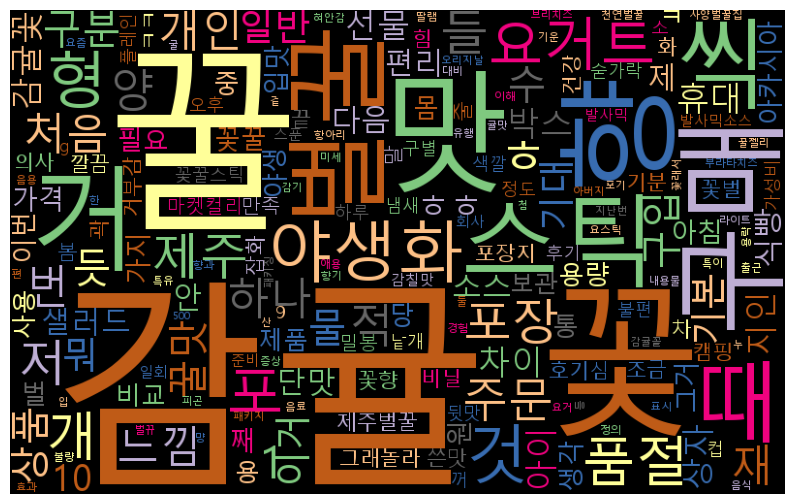

In [24]:
wc_kw(2,'감귤')

In [16]:
kurly_jeju = kurly_data[kurly_data['ProductCode']==5026039]

In [ ]:
wc_analysis(kurly_data[kurly_data['ReviewText'].apply(lambda x:keyword in x)]['token_verbs_bareun'])

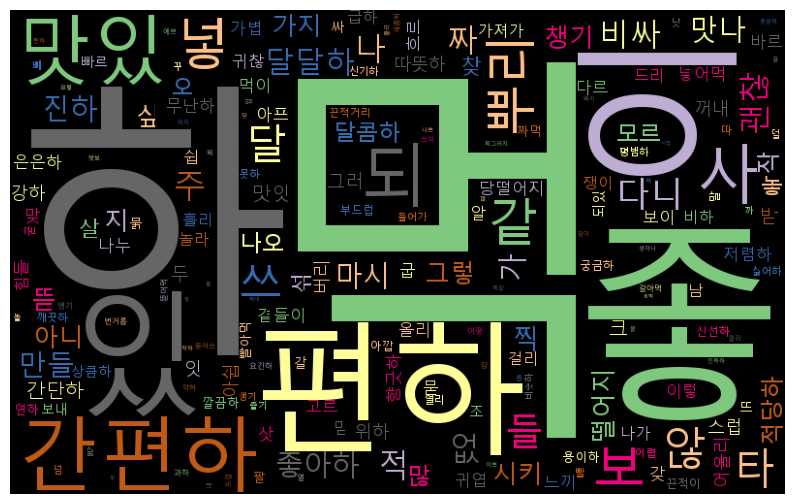

In [25]:
wc_analysis(kurly_jeju['token_verbs_bareun'])

In [18]:
kurly_data['sentiment_label'].value_counts()

sentiment_label
1    10074
0      580
Name: count, dtype: int64